# Assignment 4 (60 points - Due on Monday October 25th by 7:00 pm ET)

**You are free to use any IDE you like.**
The output of this assignment for submission should be in PDF format **AND** .py or .ipynb. The name of the file should be as follows: Lastname_Firstname_Assignment4.pdf (example: Thomas_Sunela_Assignment4.pdf) ****AND**** Lastname_Firstname_Assignment4.ipynb (example: Thomas_Sunela_Assignment4.ipynb. In short, you are submitting the python notebook as well as the pdf of that notebook.

Incorrect file name will cost you points! Do NOT submit HTML code file.
Instructions for converting a Jupyter Python notebook to PDF: Go to the menu and choose, File --> Download As --> html

Open that html file and print it to PDF.

**Things to note:**
* Output should be displayed for each question

## Use the NDFootballScore file to answer the following questions. Each question answer should be displayed. The meaning of some of the variables are described below.
* Season = the year the game was played
* Site = Home or Away game
* ND Coach = ND Coach's name
* W/L/T = Win, Loss or Tie


<h3> You may need to recode some variables like W/L/T etc. so that the results are meaningful. Ensure there are sufficient comments in what you are doing.  For example, if there are multiple things asked in one question, separate it out with adequate comments. 

### 1. Load and explore the data. Remove unnecessary columns to only retain "Season, W/L/T, Score, and Opponent". Rename the `W/L/T` column to `result`. Make all the column names lowercase 

In [125]:
# Answer

In [126]:
import pandas as pd

df = pd.read_csv('NDFootballScore.csv')
df = df.drop(columns = ['Site', 'Month', 'Day', 'Year', 'ND Coach', 'Opp. Coach', 'Opp. Rank'])
df = df.rename(columns = {'W/L/T':'result'})
df.columns = df.columns.str.lower()
df

,season,result,score,nd rank,opponent
0,1887,L,0-8,No Poll,MICHIGAN
1,1888,L,6-26,No Poll,MICHIGAN
2,1888,L,4-10,No Poll,MICHIGAN
3,1888,W,20-0,No Poll,HARVARD PREP
4,1889,W,9-0,No Poll,NORTHWESTERN
...,...,...,...,...,...
1257,2016,L,31-34,Not Ranked,VIRGINIA TECH
1258,2016,L,27-45,Not Ranked,SOUTHERN CAL
1259,2017,W,49-16,Not Ranked,TEMPLE
1260,2017,L,19-20,24,GEORGIA


### 2. Use Boolean Indexing (Boolean Selection) to calculate ND's all-time winning percentage.  Store the result in the variable **all_time_win_pct**. 
* Using f strings, print: *"Notre Dame Football's all time winning percentage is XX.X%."*



$$\text{all-time winning pct} = \frac{\text{ # of wins}}{\text{# games played} - \text{# of ties}}$$

In [127]:
# Answer

In [128]:
import numpy as np

all_time_win_pct = np.count_nonzero(df.result == 'W') / (len(df.result) - np.count_nonzero(df.result == 'T'))

In [129]:
print('Notre Dame Football\'s all time winning percentage is %s.' % all_time_win_pct)

Notre Dame Football's all time winning percentage is 0.7352459016393442.


### 3. What is the Average Margin of Victory
The formula for Avg Margin of Victory is as follows.

avg_mov = (sum(nd_score) - sum(opp_score)) / num_wins

Answer the following questions:

1. For all of the games that Notre Dame won, what was the avg margin of victory?
2. For games played in the 1999 season, what was the avg margin of victory?

Note: This requires you to create two new columns `nd_score` and `opp_score`

In [130]:
# Answer

# Your formula says number of wins, but everything I've seen on the subject suggests that margin of victory can be negative
# see: (https://www.pro-football-reference.com/blog/indexcb30.html?p=47)
# As a result, I've left it with the complete number including losses, but would use
# winDf = df[df['result'] == 'W'], and then winDf instead of df. I would also base df1999 off of winDf 
# df1999 = winDf[winDf['season'] == 1999]
# before I add the nd_score and opp_score columns if it was to only count wins.


In [131]:

df['nd_score'] = df.apply(lambda row: row.score.partition('-')[0], axis = 1)
df['opp_score'] = df.apply(lambda row: row.score.partition('-')[2], axis = 1)

avg_mov = (sum(df['nd_score'].astype('int32'))-sum(df['opp_score'].astype('int32'))) / len(df)


In [132]:
print('Notre Dame Football\'s average margin of victory is %s.' % avg_mov)

Notre Dame Football's average margin of victory is 12.933438985736926.


In [133]:
df1999 = df[df['season'] == 1999]
df1999['nd_score'] = df1999.apply(lambda row: row.score.partition('-')[0], axis = 1)
df1999['opp_score'] = df1999.apply(lambda row: row.score.partition('-')[2], axis = 1)

avg_mov = (sum(df1999['nd_score'].astype('int32'))-sum(df1999['opp_score'].astype('int32'))) / len(df1999)

C:\Users\Peter\AppData\Local\Temp/ipykernel_25684/2030145909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1999['nd_score'] = df1999.apply(lambda row: row.score.partition('-')[0], axis = 1)
C:\Users\Peter\AppData\Local\Temp/ipykernel_25684/2030145909.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1999['opp_score'] = df1999.apply(lambda row: row.score.partition('-')[2], axis = 1)


In [134]:
print('Notre Dame Football\'s average margin of victory in 1999 was %s.' % avg_mov)

Notre Dame Football's average margin of victory in 1999 was 1.4166666666666667.


### 4. Create Plots for the following:

1. Histogram of the nd_score using 100 bins
2. Boxplot for the nd_score and opp_score on the same chart
3. Plot the top 10 teams by the number of games played

In [135]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (15,9)

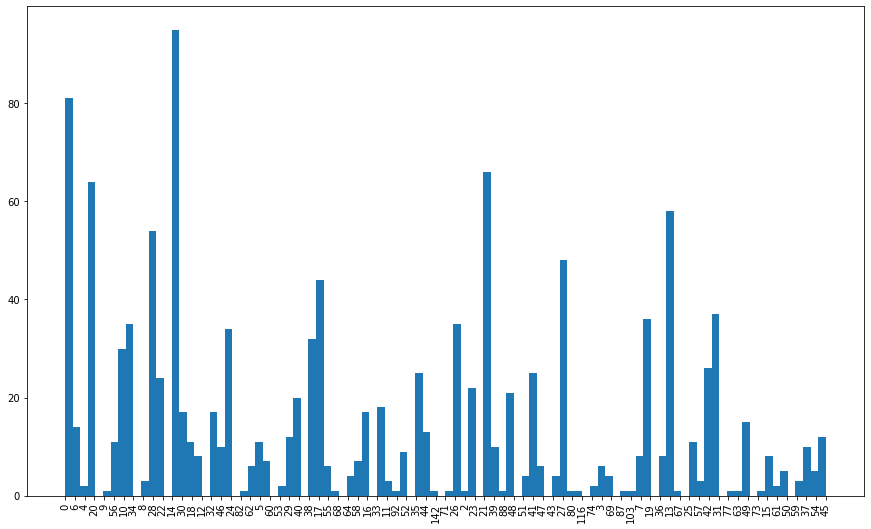

In [136]:
plt.xticks(rotation = 90)
plt.hist(df.nd_score, bins=100)
plt.show()

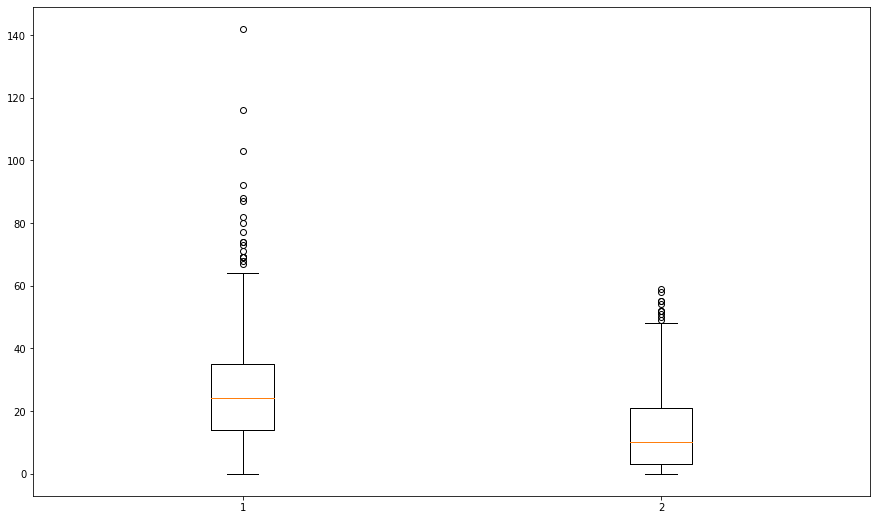

In [159]:
data = [df['nd_score'], df['opp_score']]
boxdf = pd.concat(data, axis = 1, keys = ['nd_score', 'opp_score'])
boxdf = boxdf.astype('int64')

plt.boxplot(boxdf)
plt.show()

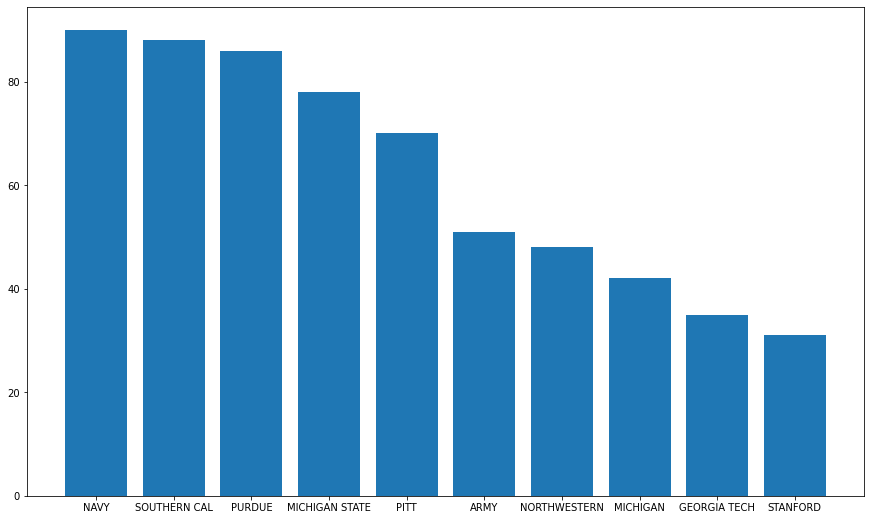

In [170]:
num_games = df['opponent'].value_counts().head(10)
num_games.index

plt.bar(num_games.index, num_games)
plt.show()